## Import các thư viện cần thiết

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

Trong bài này, nhóm sẽ dử dụng thuật toán hồi quy để dự đoán cân nặng dựa trên chiều dài của một bộ trong động vật, ví dụ cụ thể ở dưới là bộ "Passeriformes" (bộ sẻ). Trong cuộc sống hằng ngày, nhìn từ vẻ bề ngoài thì chúng ta rất dễ dàng biết một con vật dài bao nhiêu nhưng nếu không cầm lên thì không thể biết nó nặng bao nhiêu. Mô hình này sẽ giúp dự đoán được cân nặng từ chiều dài. Để dự đoán cân nặng từ chiều dài của tất cả động vật thì rất khó, tại vì mỗi động vật sẽ có những đặc điểm khác nhau, nhưng khi nó thuộc cùng một bộ, nó sẽ có rất nhiều đặc điểm giống nhau và có thể suy luận được sự liên quan này. 

## Đọc dữ liệu từ file
File dữ liệu của đồ án sau bước thu thập dữ liệu đang nằm tại địa chỉ '../thu_thap_du_lieu/animal_crawler/animal_info.csv'. Ta sẽ tiến hành đọc dữ liệu đã thu thập và lưu vào DataFrame `animal_df`

In [18]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)

/tmp/ipykernel_387/2748818031.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)


In [19]:
#Lọc ra dữ liệu có bộ là Passeriformes
order = 'Passeriformes'
order_df = data_df[data_df['Order'] == order]

## Loại bỏ các giá trị nan

In [20]:
#Loại bỏ các giá trị nan
order_df = order_df.dropna(subset = ['Length', 'Weight'])

Ta sẽ xem các giá trị có trong 2 cột length và weight

In [22]:
order_df[['Length', 'Weight']].head(10)

,Length,Weight
19031,0.1600,0.0320
19032,0.6050,1.3500
19034,0.2600,0.0850
19036,0.2550,0.0765
19039,0.2625,0.1025
19045,0.2225,0.0493
19049,0.1325,0.0190
19051,0.2100,0.0795
19060,0.1575,0.0205
19062,0.2000,0.0545


Ta sẽ xem mối quan hệ giữa chiều dài và cân nặng :

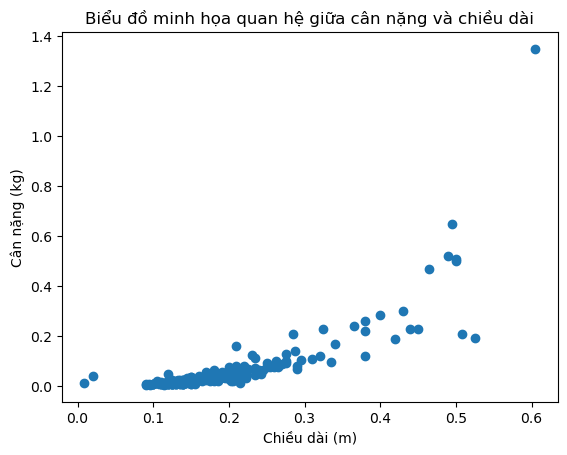

In [23]:
plt.scatter(x = order_df['Length'], y = order_df['Weight'])
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (m)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

## Loại bỏ các outlier

Như hình trên, dữ liệu vẫn còn 1 số outlier, trước hết ta cần loại bỏ những outlier này, ta sẽ sử dụng phương pháp IQR

In [24]:
def remove_outlier_iqr(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_iqr = q1 - iqr * 1.5
    upper_iqr = q3 + iqr * 1.5
    #remove outlier
    new_df = df[df[col] <= upper_iqr]
    new_df = new_df[new_df[col] >= lower_iqr]
    return new_df

order_df = remove_outlier_iqr(order_df, 'Weight')
order_df = remove_outlier_iqr(order_df, 'Length')

Xem lại kết quả sau khi loại bỏ outlier

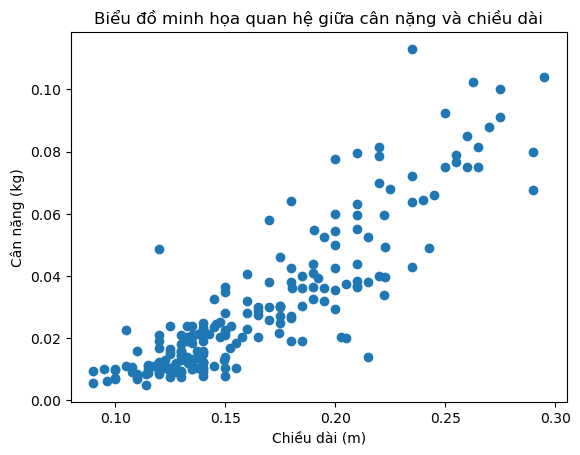

In [26]:
plt.scatter(x = order_df['Length'], y = order_df['Weight'])
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (m)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

#  Training model 

## Linear regression

In [27]:
length = np.array(order_df['Length']).reshape(-1, 1)
weight = np.array(order_df['Weight'])
X_train, X_test, y_train, y_test = train_test_split(length, weight, train_size =0.7, random_state=1)

Xem tập test và tập train

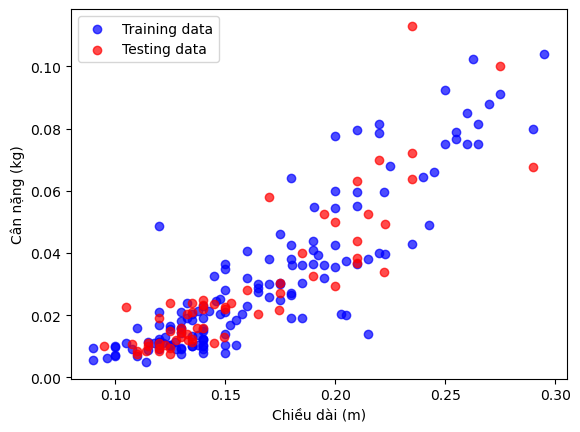

In [29]:
plt.scatter(x = X_train, y = y_train, color = 'b', label = "Training data", alpha = 0.7)
plt.scatter(x = X_test, y = y_test, color = 'r', label = "Testing data", alpha = 0.7)
plt.legend()
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (m)')
plt.show()

In [30]:
#Tạo và train model
model = LinearRegression()

model = model.fit(X_train, y_train)


In [31]:
#Sử dụng model để predict tập test

y_predict = model.predict(X_test)

y_predict

array([ 0.03292106,  0.02838763,  0.0238542 ,  0.0079872 ,  0.01705406,
        0.02498756,  0.03972121,  0.01705406,  0.05545221,  0.03496111,
        0.05672157,  0.01252063,  0.01478734,  0.06238836,  0.01478734,
        0.01614737,  0.03518778,  0.00572048,  0.01705406,  0.00345377,
        0.02350286,  0.0533215 ,  0.01025391,  0.0159207 ,  0.01796075,
        0.01025391,  0.0159207 ,  0.01138727,  0.01932077,  0.08052208,
        0.01705406,  0.01025391, -0.00107966,  0.02158749,  0.06238836,
        0.01932077,  0.01478734,  0.04425464,  0.03518778,  0.01932077,
        0.05105478,  0.01918477,  0.05105478,  0.02158749,  0.01252063,
        0.05105478,  0.01252063,  0.04198792,  0.00458713,  0.00572048,
        0.06238836,  0.05105478,  0.0564949 ,  0.0238542 ,  0.01365399,
        0.01252063,  0.04652135,  0.03065435,  0.01025391,  0.08732222,
        0.00753386,  0.04652135,  0.0079872 ])

### Vẽ biểu đồ minh họa

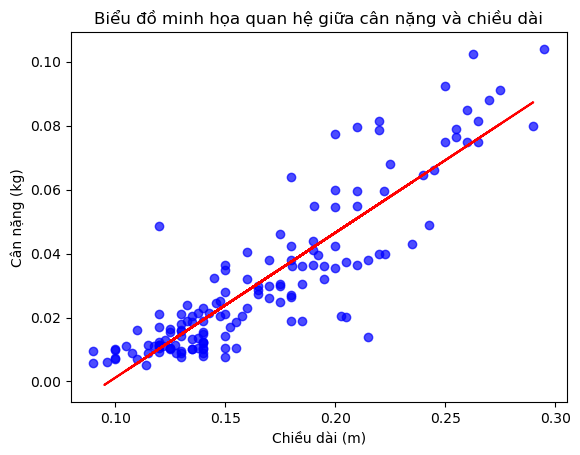

In [33]:

plt.scatter(x = X_train, y = y_train, color = 'b', alpha = 0.7)
plt.plot(X_test, y_predict, 'r')
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (m)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

### Đánh giá mô hình

Sử dụng K-Fold cross validation để đánh giá mô hình, mô hình này hiệu quả khi dữ liệu ít, phù hợp với bài toán hiện tại

In [34]:
#Thử xuất ra số dòng của cột length
len(length)

208

In [35]:
# Sử dụng 5 fold để đánh giá
#MSE
scores = - cross_val_score(model, length, weight, scoring='neg_mean_squared_error', cv=5)
scores  

array([1.18239323e-04, 1.12765743e-04, 1.50528620e-04, 6.86263615e-05,
       1.87065761e-04])

In [36]:
# Điểm trung bình
scores.mean()

0.00012744516163350138

In [37]:
#RMSE
scores = - cross_val_score(model, length, weight, scoring='neg_root_mean_squared_error', cv=5)
scores  

array([0.01087379, 0.01061912, 0.01226901, 0.0082841 , 0.0136772 ])

In [38]:
# Điểm trung bình
scores.mean()

0.011144644855046739

## Decision Tree Regressor Model

In [39]:
# data = length
# print(data)
# data = length.reshape(-1, 1)
# data = data.sort(key=lambda x: int(x[0]))

data = length
target = weight

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor(max_depth=5).fit(data, target)
y_predict = tree.predict(data)
mse = mean_squared_error(target, y_predict)

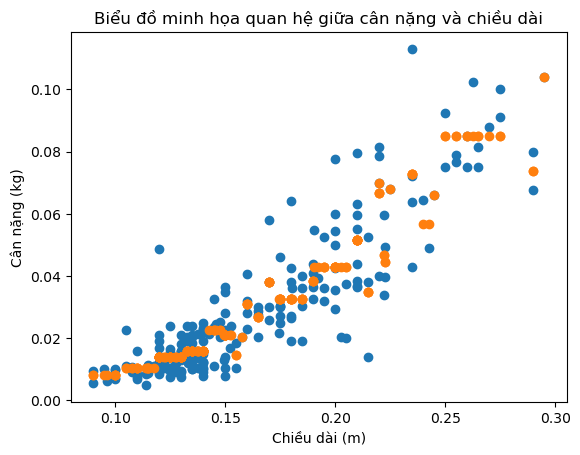

In [43]:
y_predict = tree.predict(length)

plt.scatter(x = length, y = weight)
plt.scatter(x = length, y = y_predict)
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (m)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

In [14]:
r2 = tree.score(length, weight)
print('Hệ số xác định (coefficient of determination):', r2)

Hệ số xác định (coefficient of determination): 0.8450053370857673


## Binned Regression Model

In [15]:
print(mse)

8.725112178829453e-05


In [16]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import make_pipeline

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=15), LinearRegression(),
)
binned_regression.fit(data, target)
y_predict = binned_regression.predict(data)
mse = mean_squared_error(target, y_predict)

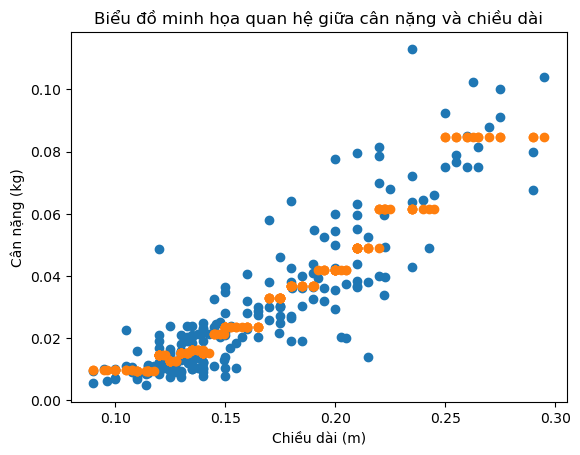

In [17]:
y_predict = binned_regression.predict(length)

plt.scatter(x = length, y = weight)
plt.scatter(x = length, y = y_predict)
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (m)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

In [18]:
r2 = binned_regression.score(length, weight)
print('Hệ số xác định (coefficient of determination):', r2)

Hệ số xác định (coefficient of determination): 0.8083252179374204


In [19]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression(),
)
polynomial_regression.fit(data, target)
y_predict = polynomial_regression.predict(data)
mse = mean_squared_error(target, y_predict)

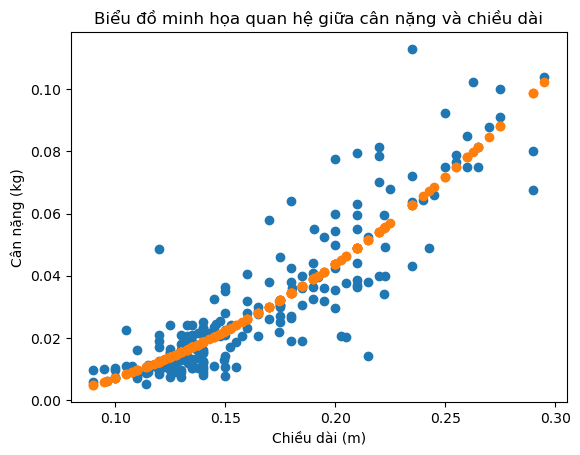

In [20]:
y_predict = polynomial_regression.predict(length)

plt.scatter(x = length, y = weight)
plt.scatter(x = length, y = y_predict)
plt.ylabel('Cân nặng (kg)')
plt.xlabel('Chiều dài (m)')
plt.title('Biểu đồ minh họa quan hệ giữa cân nặng và chiều dài')
plt.show()

In [21]:
r2 = polynomial_regression.score(length, weight)
print('Hệ số xác định (coefficient of determination):', r2)

Hệ số xác định (coefficient of determination): 0.7977713764677833


### Đánh giá mô hình

Với mô hình hồi quy đa thức trên, vì tập dữ liệu nhỏ, ta có thể sử dụng phương pháp đánh giá Leave-one-out Cross-validation, và vì đặc trưng của dữ liệu, ta sử dụng độ đo đánh giá MSE và RMSE.

Để tìm ra bậc đa thức tối ưu nhất cho tập dữ liệu, ta thử các bậc từ 1 đến 20, sử dụng MSE và RMSE để tìm ra bậc tối ưu.

In [22]:
degree = []
mse = []
rmse = []

for deg in range(1, 21):
    model = make_pipeline(
        PolynomialFeatures(degree=deg, include_bias=False),
        LinearRegression()
    )
    mse_score = - cross_val_score(model, length, weight, scoring = 'neg_mean_squared_error', cv = len(length)).mean()
    rmse_score = - cross_val_score(model, length, weight, scoring = 'neg_root_mean_squared_error', cv = len(length)).mean()

    degree.append(deg)
    mse.append(mse_score)
    rmse.append(rmse_score)

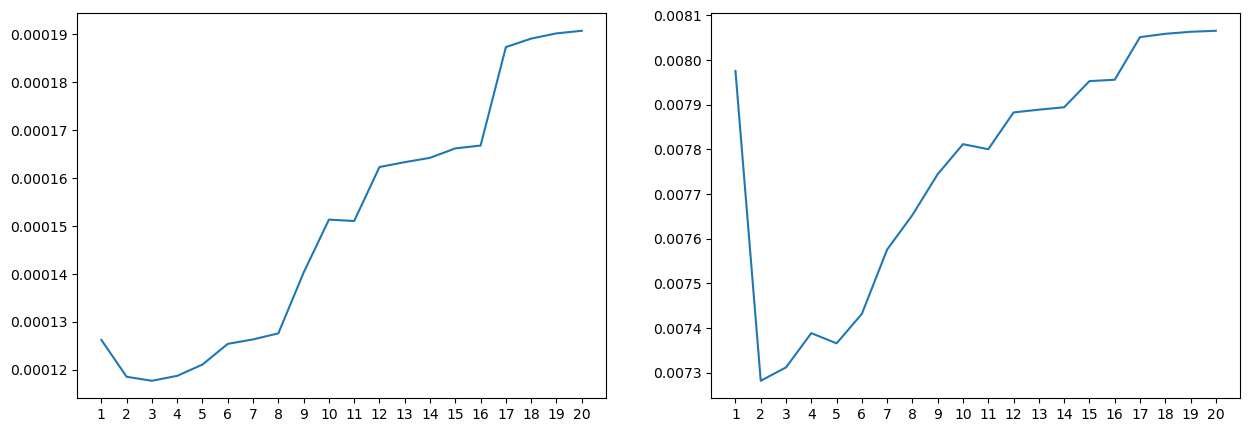

In [23]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(degree, mse)
axs[0].set_xticks(np.arange(1, 21))
axs[1].plot(degree, rmse)
axs[1].set_xticks(np.arange(1, 21));

Theo 2 biểu đồ trên, ta thấy được độ chính xác của mô hình cao nhất khi bậc bằng 2 và 3, các bậc lớn hơn làm cho mô hình sai nhiều hơn, đó là kết quả của việc overfitting mô hình hồi quy đa thức.